## IMPORT NECESSARY LIBRARIES

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## IMPORT DATA

In [2]:
claims_data = pd.read_csv('claims.csv')
cust_data = pd.read_csv('cust_demographics.csv')

In [3]:
claims_data.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No


In [4]:
claims_data.shape

(1100, 10)

In [5]:
cust_data.head(2)

,customer_id,gender,date_of_birth,state,contact,segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver


In [6]:
cust_data.shape

(1085, 6)

### Merge 2 datsets to get a 360 view

In [7]:
df = pd.merge(left = cust_data,right = claims_data, on = ['customer_id'],how = "outer")
df.head()

,customer_id,gender,date_of_birth,state,contact,segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022.0,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,63017412.0,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,47830476,Female,01-May-86,MA,413-187-7945,Silver,13015401.0,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No


In [8]:
df.shape

(1107, 15)

### Data audit 

In [9]:
# lets change the date of birth and claim date data datype to date time format

In [10]:
df["date_of_birth"] = pd.to_datetime(df.date_of_birth, format = "%d-%b-%y")
df["claim_date"] = pd.to_datetime(df.claim_date, format = "%m/%d/%Y")
df.head(2)

,customer_id,gender,date_of_birth,state,contact,segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764.0,Driver error,2017-11-27,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796.0,Crime,2018-10-03,Home,Unknown,Material only,$2980,3.0,No


In [11]:
print(df['date_of_birth'].dtype)
print(df['claim_date'].dtype)

datetime64[ns]
datetime64[ns]


In [12]:
# change column claim amount data type to numeric and removing the dollar sign.

In [13]:
df['claim_amount'] = df['claim_amount'].str.replace('$', '')
df['claim_amount'] = pd.to_numeric(df['claim_amount'])

C:\Users\sushmi\AppData\Local\Temp\ipykernel_1344\3163226399.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['claim_amount'] = df['claim_amount'].str.replace('$', '')


In [14]:
df['claim_amount'].dtype

dtype('float64')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1107 entries, 0 to 1106
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   customer_id          1107 non-null   int64         
 1   gender               1092 non-null   object        
 2   date_of_birth        1092 non-null   datetime64[ns]
 3   state                1092 non-null   object        
 4   contact              1092 non-null   object        
 5   segment              1092 non-null   object        
 6   claim_id             1100 non-null   float64       
 7   incident_cause       1100 non-null   object        
 8   claim_date           1100 non-null   datetime64[ns]
 9   claim_area           1100 non-null   object        
 10  police_report        1100 non-null   object        
 11  claim_type           1100 non-null   object        
 12  claim_amount         1035 non-null   float64       
 13  total_policy_claims  1090 non-nul

#####  Every columns data types matches the data. no more issues with data types.

In [48]:
# create an alert flag for the police report column.

In [16]:
df["alert_flag"] = np.where(df.police_report=='Yes',1,np.where(df.police_report == 'No',0, np.nan))
df.tail() 

,customer_id,gender,date_of_birth,state,contact,segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alert_flag
1102,35951012,NaN,NaT,NaN,NaN,NaN,97727122.0,Other driver error,2017-06-11,Auto,No,Material only,3059.0,4.0,Yes,0.0
1103,14818669,NaN,NaT,NaN,NaN,NaN,10247193.0,Natural causes,2018-03-14,Auto,No,Material only,1520.0,2.0,No,0.0
1104,85322831,NaN,NaT,NaN,NaN,NaN,79807493.0,Other driver error,2018-02-09,Auto,No,Material and injury,23575.0,2.0,Yes,0.0
1105,73449366,NaN,NaT,NaN,NaN,NaN,69299345.0,Other causes,2018-03-21,Auto,Unknown,Material and injury,25120.0,1.0,No,NaN
1106,43020876,NaN,NaT,NaN,NaN,NaN,58809728.0,Other driver error,2017-06-04,Auto,Yes,Material and injury,36685.0,3.0,Yes,1.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1107 entries, 0 to 1106
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   customer_id          1107 non-null   int64         
 1   gender               1092 non-null   object        
 2   date_of_birth        1092 non-null   datetime64[ns]
 3   state                1092 non-null   object        
 4   contact              1092 non-null   object        
 5   segment              1092 non-null   object        
 6   claim_id             1100 non-null   float64       
 7   incident_cause       1100 non-null   object        
 8   claim_date           1100 non-null   datetime64[ns]
 9   claim_area           1100 non-null   object        
 10  police_report        1100 non-null   object        
 11  claim_type           1100 non-null   object        
 12  claim_amount         1035 non-null   float64       
 13  total_policy_claims  1090 non-nul

In [18]:
# One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID  should remain unique.  
#Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.

In [19]:
df= df.groupby('customer_id').first().reset_index(drop = True)
df.head(3)

,gender,date_of_birth,state,contact,segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alert_flag
0,Female,1978-05-23,DE,962-879-1238,Platinum,69348631.0,Driver error,2018-04-10,Auto,No,Injury only,NaN,1.0,Yes,0.0
1,Male,1972-12-20,TX,173-892-6314,Silver,40953049.0,Other causes,2018-04-04,Auto,No,Material and injury,39192.0,1.0,Yes,0.0
2,Male,1988-07-28,FL,364-598-1549,Silver,45780237.0,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.5,2.0,Yes,NaN


In [20]:
df.isnull().sum()

gender                  15
date_of_birth           15
state                   15
contact                 15
segment                 15
claim_id                 7
incident_cause           7
claim_date               7
claim_area               7
police_report            7
claim_type               7
claim_amount            72
total_policy_claims     17
fraudulent               7
alert_flag             303
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   gender               1085 non-null   object        
 1   date_of_birth        1085 non-null   datetime64[ns]
 2   state                1085 non-null   object        
 3   contact              1085 non-null   object        
 4   segment              1085 non-null   object        
 5   claim_id             1093 non-null   float64       
 6   incident_cause       1093 non-null   object        
 7   claim_date           1093 non-null   datetime64[ns]
 8   claim_area           1093 non-null   object        
 9   police_report        1093 non-null   object        
 10  claim_type           1093 non-null   object        
 11  claim_amount         1028 non-null   float64       
 12  total_policy_claims  1083 non-null   float64       
 13  fraudulent           1093 non-nul

In [22]:
#imputing missing rows categorical col  = mode numerical col with mean 

In [23]:
cat_col = ['gender','state','segment','incident_cause','claim_area','police_report','claim_type','fraudulent', 'total_policy_claims']
con_col = ['claim_amount']
for col in cat_col:
    df[col] = df[col].fillna(df[col].mode()[0])
    
df[con_col] = df[con_col].fillna(df[con_col].mean())
df.head()

,gender,date_of_birth,state,contact,segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alert_flag
0,Female,1978-05-23,DE,962-879-1238,Platinum,69348631.0,Driver error,2018-04-10,Auto,No,Injury only,12444.72714,1.0,Yes,0.0
1,Male,1972-12-20,TX,173-892-6314,Silver,40953049.0,Other causes,2018-04-04,Auto,No,Material and injury,39192.00000,1.0,Yes,0.0
2,Male,1988-07-28,FL,364-598-1549,Silver,45780237.0,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.50000,2.0,Yes,NaN
3,Male,1971-08-19,CA,187-348-8375,Gold,89833962.0,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.00000,1.0,No,1.0
4,Female,1980-08-10,NC,798-862-5398,Gold,35782742.0,Other driver error,2018-07-27,Auto,No,Injury only,35250.00000,3.0,No,0.0


In [24]:
df.isnull().sum()

gender                   0
date_of_birth           15
state                    0
contact                 15
segment                  0
claim_id                 7
incident_cause           0
claim_date               7
claim_area               0
police_report            0
claim_type               0
claim_amount             0
total_policy_claims      0
fraudulent               0
alert_flag             303
dtype: int64

In [25]:
pd.DataFrame(df.groupby(df['claim_date'].dt.month).claim_id.count().reset_index())

,claim_date,claim_id
0,1.0,105
1,2.0,91
2,3.0,114
3,4.0,102
4,5.0,94
5,6.0,95
6,7.0,108
7,8.0,90
8,9.0,77
9,10.0,123


In [26]:
df.loc[df.claim_date.isnull(),'claim_date'] = pd.Timestamp('2017-10-01')

In [27]:
df.isnull().sum()

gender                   0
date_of_birth           15
state                    0
contact                 15
segment                  0
claim_id                 7
incident_cause           0
claim_date               0
claim_area               0
police_report            0
claim_type               0
claim_amount             0
total_policy_claims      0
fraudulent               0
alert_flag             303
dtype: int64

In [84]:
# alert flag has 303 missing rows because there are many unknowns in  police reports 

In [29]:
# Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria Children < 18 Youth 18-30 Adult 30-60 Senior > 60

In [30]:
df["Age"] = (pd.DatetimeIndex(df.claim_date).year - pd.DatetimeIndex(df.date_of_birth).year)
df.loc[(df.Age < 18) & (df.Age >0),'Age_Group'] = 'Children'
df.loc[(df.Age >=18) & (df.Age <30),'Age_Group'] = 'Youth'
df.loc[(df.Age >=30) & (df.Age <60),'Age_Group'] = 'Adult'
df.loc[(df.Age >=60),'Age_Group'] = 'Senior'
df

,gender,date_of_birth,state,contact,segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alert_flag,Age,Age_Group
0,Female,1978-05-23,DE,962-879-1238,Platinum,69348631.0,Driver error,2018-04-10,Auto,No,Injury only,12444.72714,1.0,Yes,0.0,40.0,Adult
1,Male,1972-12-20,TX,173-892-6314,Silver,40953049.0,Other causes,2018-04-04,Auto,No,Material and injury,39192.00000,1.0,Yes,0.0,46.0,Adult
2,Male,1988-07-28,FL,364-598-1549,Silver,45780237.0,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.50000,2.0,Yes,NaN,29.0,Youth
3,Male,1971-08-19,CA,187-348-8375,Gold,89833962.0,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.00000,1.0,No,1.0,47.0,Adult
4,Female,1980-08-10,NC,798-862-5398,Gold,35782742.0,Other driver error,2018-07-27,Auto,No,Injury only,35250.00000,3.0,No,0.0,38.0,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,Male,2065-01-28,UT,517-562-4916,Silver,4549014.0,Other causes,2018-07-07,Auto,No,Injury only,21480.00000,1.0,No,0.0,-47.0,NaN
1096,Female,2066-06-19,HI,457-752-1374,Gold,35453672.0,Natural causes,2018-01-06,Auto,Yes,Material and injury,14360.00000,1.0,No,1.0,-48.0,NaN
1097,Female,2063-11-18,NC,643-246-4718,Silver,37305754.0,Natural causes,2018-04-04,Auto,No,Material only,1242.00000,1.0,Yes,0.0,-45.0,NaN
1098,Male,1995-06-08,OR,395-246-6172,Gold,22960702.0,Driver error,2017-11-13,Auto,No,Material only,2415.00000,2.0,Yes,0.0,22.0,Youth


## Data analysis
- Here I have answered important questions

#### Average amount claimed by the customers from various  segments

In [31]:
df.groupby('segment')['claim_amount'].mean()

segment
Gold        12674.667246
Platinum    12368.864254
Silver      12268.874044
Name: claim_amount, dtype: float64

#####  INSIGHTS:
- average amount claimed is more or less same with each other
- Gold segment has seen higher average claims 

#####  The total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [32]:
df[df.claim_date < "2018-09-10"].groupby('incident_cause')['claim_amount'].mean().reset_index()

,incident_cause,claim_amount
0,Crime,7222.630056
1,Driver error,14012.709471
2,Natural causes,7557.609450
3,Other causes,14429.223529
4,Other driver error,14586.547210


#####  Draw a pie chart between the aggregated value of claim amount based  on gender and segment. 

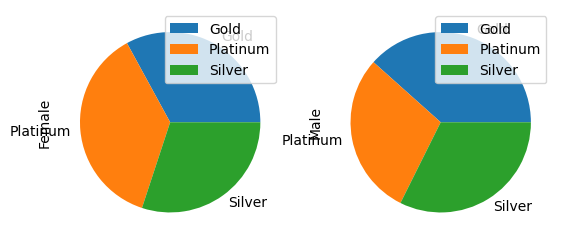

In [82]:
pie = df.groupby(['segment','gender'])['claim_amount'].sum().reset_index()
pie.pivot(index="segment", columns= "gender", values= "claim_amount").plot(kind = "pie", legend= True, subplots = True)
plt.show()

##### Among males and females, which gender had claimed the most for any  type of driver related issues? E.g. This metric can be compared using a bar chart 

In [35]:
p1 =df.loc[(df.incident_cause.str.lower().str.contains("driver")
               )].groupby("gender")[["gender"]].count().add_prefix("CountOf_").reset_index()
p1

,gender,CountOf_gender
0,Female,221
1,Male,285


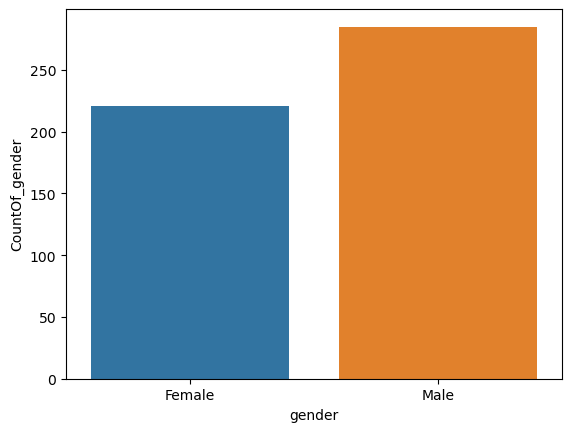

In [36]:
sns.barplot(x = "gender", y = "CountOf_gender", data = p1 )
plt.show()

##### The age group which  had the maximum fraudulent policy claims? 

In [37]:
p2 = df.groupby("Age_Group")[["fraudulent"]].count().reset_index()
p2

,Age_Group,fraudulent
0,Adult,515
1,Youth,324


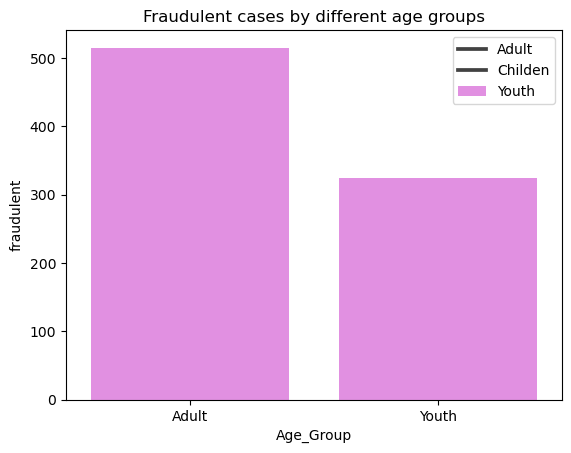

In [68]:
sns.barplot(x = 'Age_Group', y = 'fraudulent', data = p2,color = 'violet')
plt.legend(['Adult','Childen','Youth'])
plt.title('Fraudulent cases by different age groups')
plt.show()

##### Visualize the monthly trend of the total amount that has been claimed  by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

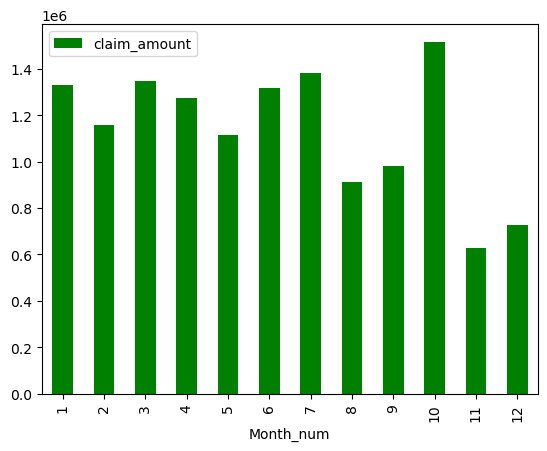

In [57]:
df['Month_num'] = pd.DatetimeIndex(df.claim_date).month
trend = df.groupby('Month_num')['claim_amount'].sum().reset_index()
pd.pivot_table(trend,index='Month_num',values="claim_amount").plot(kind = "bar", color='green')
plt.show()

##### What is the average claim amount for gender and age categories 


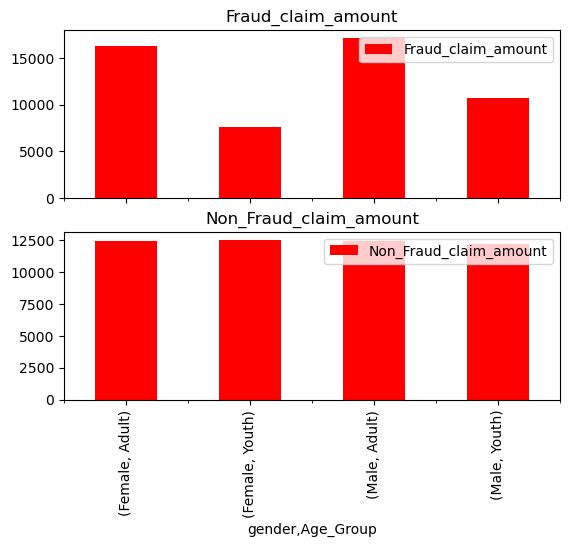

In [56]:
f = df[(df.fraudulent=="Yes")].groupby(["gender","Age_Group"])[["claim_amount"]].mean().add_prefix("Fraud_")
nf = df[(df.fraudulent=="No")].groupby(["gender","Age_Group"])[["claim_amount"]].mean().add_prefix("Non_Fraud_")
f_nf=round(pd.merge(f,nf,on=["gender","Age_Group"]),2)
f_nf.plot(kind="bar", subplots= True, legend= True,color= 'red')
plt.show()

##### Is there any similarity in the amount claimed by males and females?

In [41]:
import scipy.stats as st
female = df['claim_amount'].loc[df['gender']=="Female"]
male = df['claim_amount'].loc[df['gender']=="Male"]
st.ttest_ind(female, male, equal_var=False)

Ttest_indResult(statistic=-0.8224293015574573, pvalue=0.41101135636800423)

### Hypothesis :
- H0 = There is no similiarity in the aount claimed by males and females
- h1 = There is a similiarity in the amount claimed by males and females
- significance_level = 0.05
- test = ttest
### conclusion
- As the p-value is greater than 0.05, we accept the null hypothesis. 
- So there is no similiarity in the amount claimed by males and females

#####  Is there any relationship between age category and segment?

In [42]:
c = pd.crosstab(df.Age_Group, df.segment, margins = True)
st.chi2_contingency(observed= c)

Chi2ContingencyResult(statistic=2.3873115449264946, pvalue=0.8808599887111777, dof=6, expected_freq=array([[178.62336114, 172.48510131, 163.89153754, 515.        ],
       [112.37663886, 108.51489869, 103.10846246, 324.        ],
       [291.        , 281.        , 267.        , 839.        ]]))

### Hypothesis:
- H0 = There is no relationship between age group and segment
- h1 = There is a relationship between age group and segment
- significance_level = 0.05
- test = chi square test
### conclusion
- As the p-value is greater than 0.05, we fail to reject the null hypothesis. 
- So there is no relationship between age_group and segments

##### The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000

In [43]:
df['year'] = pd.DatetimeIndex(df.claim_date).year
CY = df.loc[df.year == 2018]["claim_amount"]
PY = df.loc[df.year == 2017]["claim_amount"]
CY.corr( PY)

nan

#### conclusion
- There is no correlation 

##### Is there any difference between age groups and insurance claims?

In [45]:
a1 = df['total_policy_claims'].loc[df['Age_Group']=="Youth"]
a2 = df['total_policy_claims'].loc[df['Age_Group']=="Adult"]
st.f_oneway(a1,a2)

F_onewayResult(statistic=0.1697350870939065, pvalue=0.680452837744339)

### Hypothesis :
- H0 = There is no difference between age groups and insurance claims
- h1 = There is a difference between age group and insurance claims
- test = anova
### conclusion
- As the p-value is greater than 0.05, we fail to reject the null hypothesis. 
- So there is no difference between age groups and insurance claims

##### Is there any relationship between total number of policy claims and the claimed amount?

In [46]:
df.total_policy_claims.corr(other= df.claim_amount)

-0.016908013703476745

#### conclusion
- negatively correlated between total number of policy claims and the claimed amount.
- Thus there is no significant relationship between the variables .